In [1]:
import numpy as np
import pyvista as pv
from pyvista.plotting.plotter import Plotter
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append(rf"D:\code\pywfn")
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.atomprop import activity,energy
from pywfn.bondprop import piDM,bondOrder
from pywfn.maths import points_rotate
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from pywfn.utils import printer
printer.ifShell=False

In [2]:
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\CHF亲核亲电\wfns"
names=['-','0','+']
engs=np.zeros(shape=(4,3))
results={}
from pywfn.atomprop import direction
for i in range(4):
    for n,name in enumerate(names):
        path=f'{root}/CH{i}F{3-i}_wfn{name}.log'
        mol=Mol(LogReader(path))
        caler=energy.Calculator(mol)
        engs[i,n]=caler.atmPiEngs()[0]
print(engs)
engs[:,0]-engs[:,1],engs[:,1]-engs[:,2]


[[-0.0979 -0.3932 -0.5416]
 [ 0.0437 -0.3501 -0.4112]
 [ 0.1241 -0.2999 -0.2329]
 [ 0.1481 -0.2284  0.    ]]


(array([0.2953, 0.3937, 0.424 , 0.3766]),
 array([ 0.1485,  0.0612, -0.067 , -0.2284]))

In [3]:
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\CHF亲核亲电\wfns"
names=['-','0','+']
datas=np.zeros(shape=(4,3))
results={}
from pywfn.atomprop import direction
for i in range(4):
    for n,name in enumerate(names):
        path=f'{root}/CH{i}F{3-i}_wfn{name}.log'
        mol=Mol(LogReader(path))
        dirs=direction.Calculator(mol).reaction(1)
        caler=activity.Calculator()
        caler.mols=[mol]
        result=caler.freeValence(1)
        datas[i,n]=result[0,-1]
        results[i,n]=result[:,-1]

In [4]:
results

{(0, 0): array([3.0944, 2.9399, 2.9395, 2.9395]),
 (0, 1): array([1.6909, 1.614 , 1.6138, 1.6138]),
 (0, 2): array([0.8236, 0.8133, 0.8132, 0.8132]),
 (1, 0): array([2.3888, 2.2479, 2.2075, 2.2073]),
 (1, 1): array([1.8317, 1.7496, 1.7704, 1.7703]),
 (1, 2): array([1.1504, 1.1632, 1.1359, 1.1359]),
 (2, 0): array([2.181 , 2.1283, 2.1273, 2.1514]),
 (2, 1): array([1.9699, 1.9466, 1.9462, 1.9558]),
 (2, 2): array([1.6024, 1.5997, 1.5997, 1.597 ]),
 (3, 0): array([1.9816, 1.9816]),
 (3, 1): array([2.0885, 2.0885]),
 (3, 2): array([2.2055, 2.2055])}

[5, 22, 39, 54]


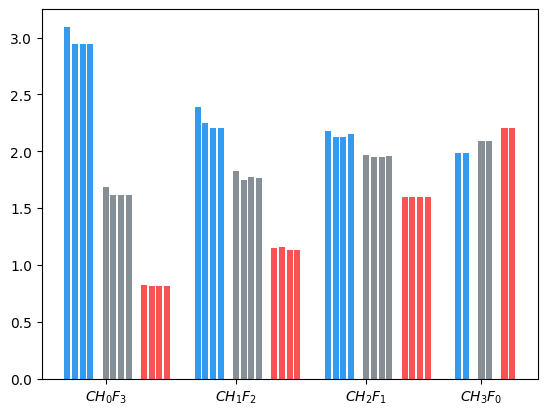

In [5]:
cs=['#339af0','#868e96','#fa5252']
idx=0
idxs=[]
for i in range(4):
    for n,name in enumerate(names):
        if n==1:idxs.append(idx)
        for v,val in enumerate(results[i,n]):
            plt.bar(idx,val,color=cs[n])
            idx+=1
        idx+=1
    idx+=2
print(idxs)
plt.xticks(idxs,[f'$CH_{i}F_{3-i}$' for i in range(4)])
plt.show()

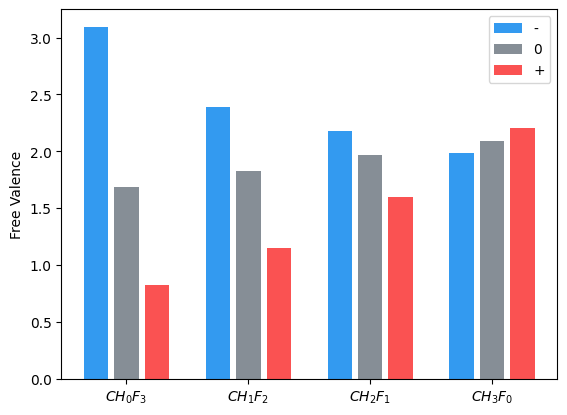

In [6]:
cs=['#339af0','#868e96','#fa5252']
labels=['-1','0','+1']
xs=[]
for i in range(4):
    for j in range(3):
        x=i*4+j
        h=datas[i,j]
        if j==1:
            xs.append(x)
        if i==0:
            plt.bar(x,h,color=cs[j],label=names[j])
        else:
            plt.bar(x,h,color=cs[j])
plt.xticks(xs,[f'$CH_{i}F_{3-i}$' for i in range(4)])
plt.ylabel('Free Valence')
plt.legend()
# plt.ylim(0,2.8)
plt.show()

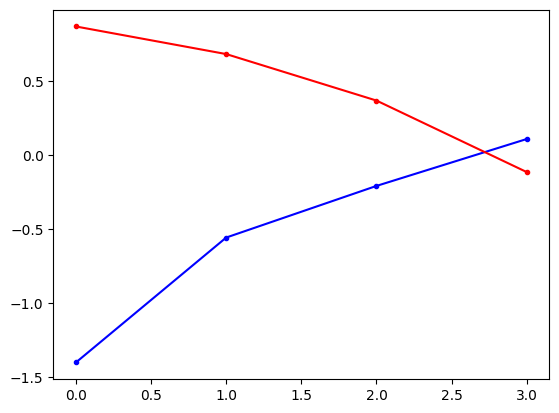

In [41]:
fe=datas[:,0]
f0=datas[:,1]
fn=datas[:,2]
ve=f0-fe
vn=f0-fn
plt.plot(ve,color='blue',marker='.')
plt.plot(vn,color='red',marker='.')
# plt.plot((ve+vn)/2,'gray',marker='.')

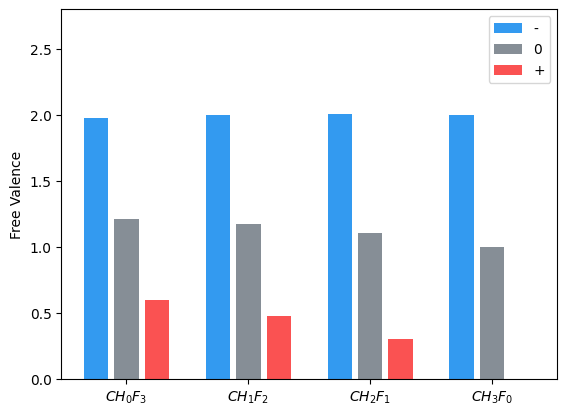

In [12]:
from pywfn.atomprop import charge
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\CHF亲核亲电\wfns"
names=['-','0','+']
datas=np.zeros(shape=(4,3))
for i in range(4):
    for n,name in enumerate(names):
        path=f'{root}/CH{i}F{3-i}_wfn{name}.log'
        mol=Mol(LogReader(path))
        
        caler=charge.Calculator(mol)
        
        result=caler.piElectron()[0,-1]
        datas[i,n]=result
cs=['#339af0','#868e96','#fa5252']
labels=['-1','0','+1']
xs=[]
for i in range(4):
    for j in range(3):
        x=i*4+j
        h=datas[i,j]
        if j==1:
            xs.append(x)
        if i==0:
            plt.bar(x,h,color=cs[j],label=names[j])
        else:
            plt.bar(x,h,color=cs[j])
plt.xticks(xs,[f'$CH_{i}F_{3-i}$' for i in range(4)])
plt.ylabel('Free Valence')
plt.legend()
plt.ylim(0,2.8)
plt.show()

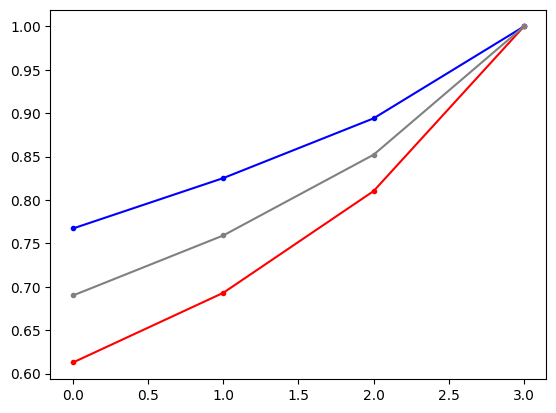

In [16]:
fe=datas[:,0]
f0=datas[:,1]
fn=datas[:,2]
ve=fe-f0
vn=f0-fn
plt.plot(ve,color='blue',marker='.')
plt.plot(vn,color='red',marker='.')
plt.plot((ve+vn)/2,'gray',marker='.')

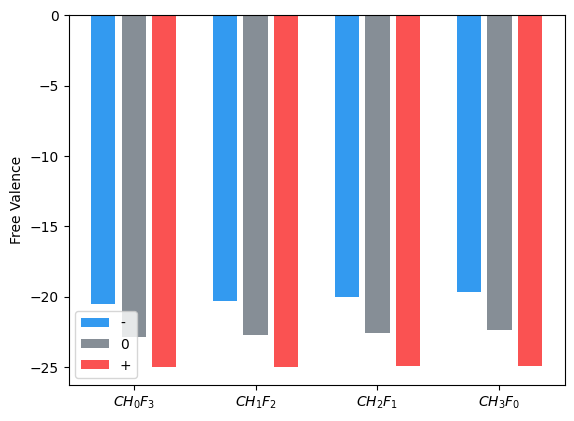

In [22]:
from pywfn.atomprop import energy
root=rf"D:\BaiduSyncdisk\Articles\HFV\gfile\CHF亲核亲电\wfns"
names=['-','0','+']
datas=np.zeros(shape=(4,3))
for i in range(4):
    for n,name in enumerate(names):
        path=f'{root}/CH{i}F{3-i}_wfn{name}.log'
        mol=Mol(LogReader(path))
        
        caler=energy.Calculator(mol)
        
        result=caler.calculate()[0]
        datas[i,n]=result
cs=['#339af0','#868e96','#fa5252']
labels=['-1','0','+1']
xs=[]
for i in range(4):
    for j in range(3):
        x=i*4+j
        h=datas[i,j]
        if j==1:
            xs.append(x)
        if i==0:
            plt.bar(x,h,color=cs[j],label=names[j])
        else:
            plt.bar(x,h,color=cs[j])
plt.xticks(xs,[f'$CH_{i}F_{3-i}$' for i in range(4)])
plt.ylabel('Free Valence')
plt.legend()
# plt.ylim(0,2.8)
plt.show()

In [25]:
datas[:,0]-datas[:,1],datas[:,1]-datas[:,2]

(array([2.402 , 2.4761, 2.544 , 2.669 ]),
 array([2.1224, 2.2598, 2.3865, 2.5534]))